## Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import f1_score, confusion_matrix, matthews_corrcoef, precision_score, recall_score
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier

### Pre-processing data

In [5]:
country_pop = pd.read_csv("country_population.csv")
fertility_rate=pd.read_csv("fertility_rate.csv")
life_exp = pd.read_csv("life_expectancy.csv")

#### Shuffle and remove first 10 countries

In [6]:
country_pop = country_pop.sample(frac=1, random_state=22)
country_pop_test = country_pop.head(10)
country_pop = country_pop.iloc[10:]

fertility_rate = fertility_rate.sample(frac=1, random_state=22)
fertility_rate_test = fertility_rate.head(10)
fertility_rate = fertility_rate.iloc[10:]

life_exp = life_exp.sample(frac=1)
life_exp_test = life_exp.head(10)
life_exp = life_exp.iloc[10:]

In [7]:
################################## Country Population ##################################

vals = []
vals_temp = []

for i in range(len(country_pop)):        
    for j in range(1,6):         
        starting_year = 1959
        stop_year = 2011
        starting_year += j
        stop_year += j    
        year_temp = starting_year
        for l in range(1,53):           
            if year_temp == stop_year:
                break       
            new_y = eval(str(year_temp+1))        
            vals_temp.append(country_pop.iloc[i][str(new_y)] - country_pop.iloc[i][str(year_temp)])
            year_temp += 1    
        vals.append(vals_temp)
        vals_temp = []

df_country = pd.DataFrame(vals)

################################## Fertility Rate ##################################

vals = []
vals_temp = []

for i in range(len(fertility_rate)):        
    for j in range(1,6):         
        starting_year = 1959
        stop_year = 2011
        starting_year += j
        stop_year += j    
        year_temp = starting_year
        for l in range(1,53):           
            if year_temp == stop_year:
                break       
            new_y = eval(str(year_temp+1))        
            vals_temp.append(fertility_rate.iloc[i][str(new_y)] - fertility_rate.iloc[i][str(year_temp)])
            year_temp += 1    
        vals.append(vals_temp)
        vals_temp = []

df_fert = pd.DataFrame(vals)

################################## Life expectancy ##################################

vals = []
vals_temp = []

for i in range(len(life_exp)):        
    for j in range(1,6):         
        starting_year = 1959
        stop_year = 2011
        starting_year += j
        stop_year += j    
        year_temp = starting_year
        for l in range(1,53):           
            if year_temp == stop_year:
                break       
            new_y = eval(str(year_temp+1))        
            vals_temp.append(life_exp.iloc[i][str(new_y)] - life_exp.iloc[i][str(year_temp)])
            year_temp += 1    
        vals.append(vals_temp)
        vals_temp = []

df_life_exp = pd.DataFrame(vals)

In [8]:
################################## Country Population ##################################

df_country = df_country.dropna()
df_country =df_country.sample(frac=1, random_state=22)

################################## Fertility Rate ##################################

df_fert = df_fert.dropna()
df_fert =df_fert.sample(frac=1, random_state=22)

################################## Life expectancy ##################################

df_life_exp = df_life_exp.dropna()
df_life_exp =df_life_exp.sample(frac=1, random_state=22)

In [20]:
################################## Country Population ##################################

X_cp = df_country.drop([51], axis=1)
y_cp = np.array(df_country[51])

################################## Fertility Rate ##################################

X_fr = df_fert.drop([51], axis=1)
y_fr = np.array(df_fert[51])

################################## Life expectancy ##################################

X_le = df_life_exp.drop([51], axis=1)
y_le = np.array(df_life_exp[51])

In [10]:
kf = KFold(n_splits=5, shuffle=False)

#### Train Model

In [11]:
################################## Country Population ##################################

vals = []
vals_temp = []

for i in range(len(country_pop_test)):        
    for j in range(1,6):         
        starting_year = 1959
        stop_year = 2011
        starting_year += j
        stop_year += j    
        year_temp = starting_year
        for l in range(1,53):           
            if year_temp == stop_year:
                break       
            new_y = eval(str(year_temp+1))        
            vals_temp.append(country_pop_test.iloc[i][str(new_y)] - country_pop_test.iloc[i][str(year_temp)])
            year_temp += 1    
        vals.append(vals_temp)
        vals_temp = []

df_country_test = pd.DataFrame(vals)

df_country_test = df_country_test.dropna()

X_poptest = df_country_test.drop([51], axis=1)
y_poptest = np.array(df_country_test[51])

################################## Fertility Rate ##################################

vals = []
vals_temp = []

for i in range(len(fertility_rate_test)):        
    for j in range(1,6):         
        starting_year = 1959
        stop_year = 2011
        starting_year += j
        stop_year += j    
        year_temp = starting_year
        for l in range(1,53):           
            if year_temp == stop_year:
                break       
            new_y = eval(str(year_temp+1))        
            vals_temp.append(fertility_rate_test.iloc[i][str(new_y)] - fertility_rate_test.iloc[i][str(year_temp)])
            year_temp += 1    
        vals.append(vals_temp)
        vals_temp = []

df_fert_test = pd.DataFrame(vals)

df_fert_test = df_fert_test.dropna()

X_ferttest = df_fert_test.drop([51], axis=1)
y_ferttest = np.array(df_fert_test[51])

################################## Life expectancy ##################################

vals = []
vals_temp = []

for i in range(len(life_exp_test)):        
    for j in range(1,6):         
        starting_year = 1959
        stop_year = 2011
        starting_year += j
        stop_year += j    
        year_temp = starting_year
        for l in range(1,53):           
            if year_temp == stop_year:
                break       
            new_y = eval(str(year_temp+1))        
            vals_temp.append(life_exp_test.iloc[i][str(new_y)] - life_exp_test.iloc[i][str(year_temp)])
            year_temp += 1    
        vals.append(vals_temp)
        vals_temp = []

df_life_exp_test = pd.DataFrame(vals)

df_life_exp_test = df_life_exp_test.dropna()

X_life_test = df_life_exp_test.drop([51], axis=1)
y_life_test = np.array(df_life_exp_test[51])

In [12]:
def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))
    print("----------------------------")

In [13]:
################################## Country Population ##################################

def compareValuesCP(prediction, real):
    plt.figure(figsize=(7,7))
    plt.scatter(prediction, real)
    plt.grid()
    plt.plot([-86657473, 86657473], [-86657473, 86657473], c="r")
    plt.show()

################################## Fertility Rate ##################################

def compareValuesFR(prediction, real):
    plt.figure(figsize=(7,7))
    plt.scatter(prediction, real)
    plt.grid()
    plt.plot([-0.158, 0.158], [-0.158, 0.158], c="r")
    plt.show()

################################## Life expectancy ##################################

def compareValuesLE(prediction, real):
    plt.figure(figsize=(7,7))
    plt.scatter(prediction, real)
    plt.grid()
    plt.plot([-1, 1], [-1, 1], c="r")
    plt.show()

### Random Forest Regressor

#### Country Population

The RVE is:  0.9994970658806287
The rmse is:  241067.67236617077
The Correlation Score is: 0.9998 (p-value=0.000000e+00)

The Maximum Error is:  2869897.9399999976
The Mean Absolute Error is:  72243.33304435483
----------------------------


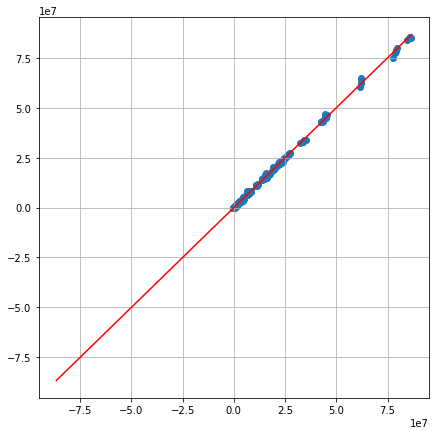

In [17]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_cp):
    
    X_train, X_test = X_cp.iloc[train_index], X_cp.iloc[test_index]
    y_train, y_test = y_cp[train_index], y_cp[test_index]
    
    rfr= RandomForestRegressor(n_estimators=100)
    rfr.fit(X_train, y_train)
    preds_rfr = rfr.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_rfr
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_rfr))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))

printRegStatistics(TRUTH_nfold, PREDS_nfold)
compareValuesCP(TRUTH_nfold, PREDS_nfold)

#### Fertility Rate

The RVE is:  0.7040468314061145
The rmse is:  0.022412776605002942
The Correlation Score is: 0.8391 (p-value=1.866704e-299)

The Maximum Error is:  0.1857374617603065
The Mean Absolute Error is:  0.009800037924698014
----------------------------


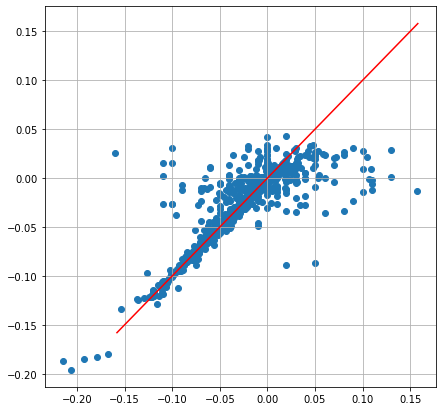

In [18]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_fr):
    
    X_train, X_test = X_fr.iloc[train_index], X_fr.iloc[test_index]
    y_train, y_test = y_fr[train_index], y_fr[test_index]
    
    rfr= RandomForestRegressor(n_estimators=100)
    rfr.fit(X_train, y_train)
    preds_rfr = rfr.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_rfr
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_rfr))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))

printRegStatistics(TRUTH_nfold, PREDS_nfold)
compareValuesFR(TRUTH_nfold, PREDS_nfold)

#### Life Expectancy

The RVE is:  0.7174002374636115
The rmse is:  0.12732016765523135
The Correlation Score is: 0.8470 (p-value=1.699099e-310)

The Maximum Error is:  1.2645074728617718
The Mean Absolute Error is:  0.05479720095581231
----------------------------


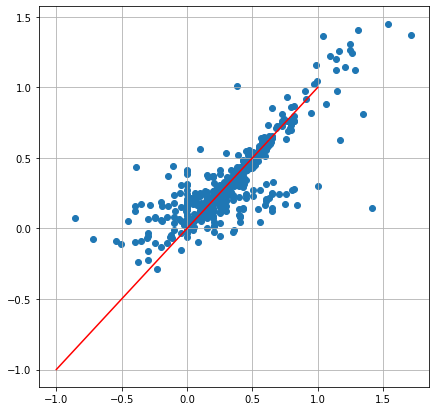

In [21]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_le):
    
    X_train, X_test = X_le.iloc[train_index], X_le.iloc[test_index]
    y_train, y_test = y_le[train_index], y_le[test_index]
    
    rfr= RandomForestRegressor(n_estimators=100)
    rfr.fit(X_train, y_train)
    preds_rfr = rfr.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_rfr
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_rfr))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))

printRegStatistics(TRUTH_nfold, PREDS_nfold)
compareValuesLE(TRUTH_nfold, PREDS_nfold)

### XGB Classifier

#### Country Population

In [23]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_cp):
    
    X_train, X_test = X_cp.iloc[train_index], X_cp.iloc[test_index]
    y_train, y_test = y_cp[train_index], y_cp[test_index]
    
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    
    bst = XGBClassifier(random_state=22)
    bst.fit(X_train, y_train)
    preds_bst = bst.predict(X_test)   
            
    if TRUTH_nfold is None:
        PREDS_nfold=preds_bst
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_bst))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
printRegStatistics(TRUTH_nfold, PREDS_nfold)

The RVE is:  2.5467152685254568e-05
The rmse is:  11301551.086378781
The Correlation Score is: 0.4892 (p-value=1.299237e-75)

The Maximum Error is:  86656550.0
The Mean Absolute Error is:  3503842.2193548386
----------------------------


#### Fertility Rate

In [24]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_fr):
    
    X_train, X_test = X_fr.iloc[train_index], X_fr.iloc[test_index]
    y_train, y_test = y_fr[train_index], y_fr[test_index]
    
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    
    bst = XGBClassifier(random_state=22)
    bst.fit(X_train, y_train)
    preds_bst = bst.predict(X_test)   
            
    if TRUTH_nfold is None:
        PREDS_nfold=preds_bst
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_bst))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
printRegStatistics(TRUTH_nfold, PREDS_nfold)

The RVE is:  -9195275.626359718
The rmse is:  285.13599298429284
The Correlation Score is: 0.7159 (p-value=1.545548e-177)

The Maximum Error is:  488.1
The Mean Absolute Error is:  256.31958508423804
----------------------------


#### Life Expectancy

In [25]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_le):
    
    X_train, X_test = X_le.iloc[train_index], X_le.iloc[test_index]
    y_train, y_test = y_le[train_index], y_le[test_index]
    
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    
    bst = XGBClassifier(random_state=22)
    bst.fit(X_train, y_train)
    preds_bst = bst.predict(X_test)   
            
    if TRUTH_nfold is None:
        PREDS_nfold=preds_bst
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_bst))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
printRegStatistics(TRUTH_nfold, PREDS_nfold)

The RVE is:  -649356.8315057313
The rmse is:  375.39207507413124
The Correlation Score is: 0.6265 (p-value=1.105578e-123)

The Maximum Error is:  710.18
The Mean Absolute Error is:  321.98599725696425
----------------------------


### Linear Regression

#### Country Population

The RVE is:  0.9999369953744082
The rmse is:  85335.03205352784
The Correlation Score is: 1.0000 (p-value=0.000000e+00)

The Maximum Error is:  1059392.162765073
The Mean Absolute Error is:  37666.14299073957
----------------------------


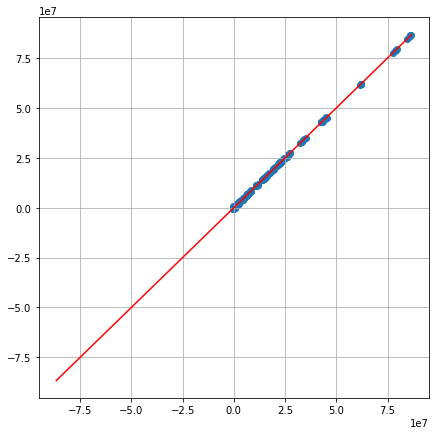

In [26]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_cp):
    
    X_train, X_test = X_cp.iloc[train_index], X_cp.iloc[test_index]
    y_train, y_test = y_cp[train_index], y_cp[test_index]
    
    linearReg = LinearRegression()
    linearReg.fit(X_train, y_train)
    preds = linearReg.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
        
printRegStatistics(TRUTH_nfold, PREDS_nfold)
compareValuesCP(TRUTH_nfold, PREDS_nfold)

#### Fertility Rate

The RVE is:  0.6391268817898974
The rmse is:  0.024750421496515802
The Correlation Score is: 0.8080 (p-value=1.615716e-260)

The Maximum Error is:  0.16824099759044508
The Mean Absolute Error is:  0.01323820805474814
----------------------------


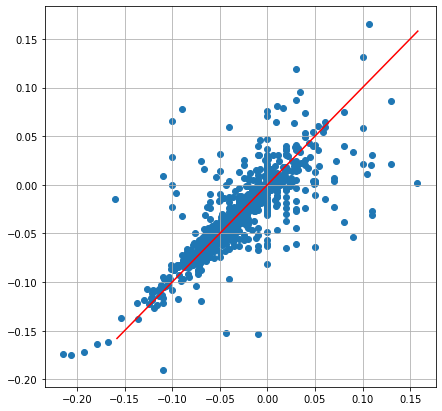

In [27]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_fr):
    
    X_train, X_test = X_fr.iloc[train_index], X_fr.iloc[test_index]
    y_train, y_test = y_fr[train_index], y_fr[test_index]
    
    linearReg = LinearRegression()
    linearReg.fit(X_train, y_train)
    preds = linearReg.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
        
printRegStatistics(TRUTH_nfold, PREDS_nfold)
compareValuesFR(TRUTH_nfold, PREDS_nfold)

#### Life Expectancy

The RVE is:  0.5105336050263763
The rmse is:  0.1675536499563087
The Correlation Score is: 0.7335 (p-value=1.504719e-190)

The Maximum Error is:  1.551771785884166
The Mean Absolute Error is:  0.08250402601323989
----------------------------


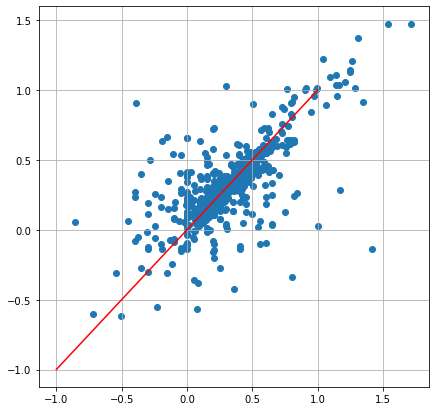

In [28]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_le):
    
    X_train, X_test = X_le.iloc[train_index], X_le.iloc[test_index]
    y_train, y_test = y_le[train_index], y_le[test_index]
    
    linearReg = LinearRegression()
    linearReg.fit(X_train, y_train)
    preds = linearReg.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
        
printRegStatistics(TRUTH_nfold, PREDS_nfold)
compareValuesLE(TRUTH_nfold, PREDS_nfold)

### Model Predictions

In [29]:
################################## Country Population ##################################

vals = []
vals_temp = []

for i in range(len(country_pop_test)):        
    starting_year = 1965
    stop_year = 2016  
    year_temp = starting_year
    for l in range(1,52):           
        if year_temp == stop_year:
            break       
        new_y = eval(str(year_temp+1))        
        vals_temp.append(country_pop_test.iloc[i][str(new_y)] - country_pop_test.iloc[i][str(year_temp)])
        year_temp += 1    
    vals.append(vals_temp)
    vals_temp = []

df_country_pop_test = pd.DataFrame(vals)

df_country_pop_test = df_country_pop_test.dropna() 

X_test_pop = df_country_pop_test

################################## Fertility Rate ##################################

vals = []
vals_temp = []

for i in range(len(fertility_rate_test)):        
    starting_year = 1965
    stop_year = 2016  
    year_temp = starting_year
    for l in range(1,52):           
        if year_temp == stop_year:
            break       
        new_y = eval(str(year_temp+1))        
        vals_temp.append(fertility_rate_test.iloc[i][str(new_y)] - fertility_rate_test.iloc[i][str(year_temp)])
        year_temp += 1    
    vals.append(vals_temp)
    vals_temp = []

df_fertility_rate_test = pd.DataFrame(vals)

df_fertility_rate_test = df_fertility_rate_test.dropna() 

X_test_fertility = df_fertility_rate_test 

################################## Life expectancy ##################################

vals = []
vals_temp = []

for i in range(len(life_exp_test)):        
    starting_year = 1965
    stop_year = 2016  
    year_temp = starting_year
    for l in range(1,52):           
        if year_temp == stop_year:
            break       
        new_y = eval(str(year_temp+1))        
        vals_temp.append(life_exp_test.iloc[i][str(new_y)] - life_exp_test.iloc[i][str(year_temp)])
        year_temp += 1    
    vals.append(vals_temp)
    vals_temp = []

df_life_exp_test = pd.DataFrame(vals)

df_life_exp_test = df_life_exp_test.dropna() 

X_test_life = df_life_exp_test

In [31]:
################################## Country Population ##################################

rfr= RandomForestRegressor(n_estimators=100)
rfr.fit(X_cp, y_cp)
final_preds_cp = rfr.predict(X_test_pop)

country_pop_2017 = pd.read_csv("country_pop_2017.csv")

real = country_pop_2017['2017'] - country_pop_2017['2016'] 
real_vals = []

vals_2016 = []
vals_2017 = []

for i in range(len(country_pop_test)):
    for j in range(len(country_pop_2017)):
        if country_pop_test.iloc[i]['Country Code'] == country_pop_2017.iloc[j]['Country Code']:
            vals_2016.append(country_pop_2017.iloc[j]['2016'])
            vals_2017.append(country_pop_2017.iloc[j]['2017'])

            

y_test_country = np.array([x1 - x2 for (x1, x2) in zip(vals_2017, vals_2016)])

################################## Fertility Rate ##################################

rfr= RandomForestRegressor(n_estimators=100)
rfr.fit(X_fr, y_fr)
final_preds_fr = rfr.predict(X_test_fertility)

country_fert_2017 = pd.read_csv("country_fert_2017.csv")

real = country_fert_2017['2017'] - country_fert_2017['2016'] 
real_vals = []

vals_2016 = []
vals_2017 = []

for i in range(len(fertility_rate_test)):
    for j in range(len(country_fert_2017)):
        if fertility_rate_test.iloc[i]['Country Code'] == country_fert_2017.iloc[j]['Country Code']:
            vals_2016.append(country_fert_2017.iloc[j]['2016'])
            vals_2017.append(country_fert_2017.iloc[j]['2017'])

            

y_test_fert = np.array([x1 - x2 for (x1, x2) in zip(vals_2017, vals_2016)])

################################## Life expectancy ##################################

rfr= RandomForestRegressor(n_estimators=100)
rfr.fit(X_le, y_le)
final_preds_le = rfr.predict(X_test_life)

life_exp_2017 = pd.read_csv("life_expectancy_2017.csv")

real = life_exp_2017['2017'] - life_exp_2017['2016'] 
real_vals = []

vals_2016 = []
vals_2017 = []

for i in range(len(life_exp_test)):
    for j in range(len(life_exp_2017)):
        if life_exp_test.iloc[i]['Country Code'] == life_exp_2017.iloc[j]['Country Code']:
            vals_2016.append(life_exp_2017.iloc[j]['2016'])
            vals_2017.append(life_exp_2017.iloc[j]['2017'])

            

y_test_life = np.array([x1 - x2 for (x1, x2) in zip(vals_2017, vals_2016)])

### Compare predictions to real values

######### Country Population #########
The RVE is:  0.9993438228391823
The rmse is:  611337.0492016952
The Correlation Score is: 0.9997 (p-value=3.662472e-14)

The Maximum Error is:  1749690.6099999994
The Mean Absolute Error is:  298208.8694999998
----------------------------


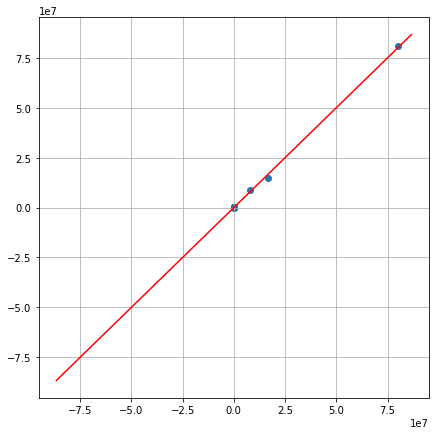

######### Fertility Rate #########
The RVE is:  -0.050534366534395136
The rmse is:  0.0241146213020118
The Correlation Score is: 0.4474 (p-value=1.948447e-01)

The Maximum Error is:  0.046800577586153524
The Mean Absolute Error is:  0.018128276164800127
----------------------------


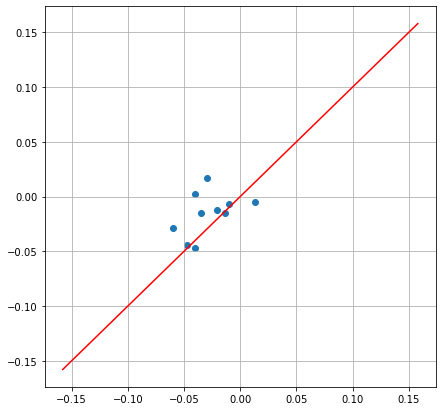

######### Life expectancy #########
The RVE is:  0.2041620513985134
The rmse is:  0.19565242516898423
The Correlation Score is: 0.4767 (p-value=1.635964e-01)

The Maximum Error is:  0.49709824803491115
The Mean Absolute Error is:  0.14625100035704647
----------------------------


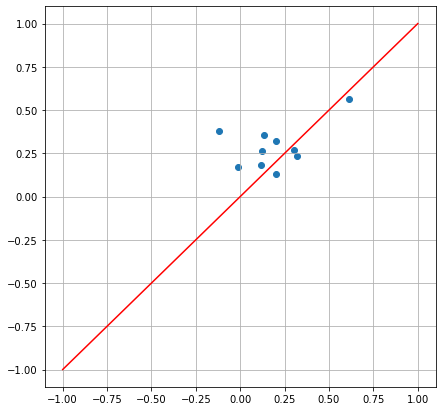

In [33]:
################################## Country Population ##################################
print("######### Country Population #########")
printRegStatistics(y_test_country, final_preds_cp)
compareValuesCP(y_test_country, final_preds_cp)

################################## Fertility Rate ##################################

print("######### Fertility Rate #########")
printRegStatistics(y_test_fert, final_preds_fr)
compareValuesFR(y_test_fert, final_preds_fr)

################################## Life expectancy ##################################

print("######### Life expectancy #########")
printRegStatistics(y_test_life, final_preds_le)
compareValuesLE(y_test_life, final_preds_le)